#Модуль 1

## 1.1 Подготовка данных

На этом экзамена необходимо решить задачу определения злоумышленника по его поведению в сети Интернет. По последовательности из десяти веб-сайтов, посещенных подряд одним и тем же человеком, мы будем идентифицировать этого человека. Идея такая: пользователи Интернета по-разному переходят по ссылкам, и это может помогать их идентифицировать.

In [ ]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# отключить предпреждения
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
train = pd.read_csv("train_ses.csv")
test = pd.read_csv("test_ses.csv")

train.head(4)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0


In [ ]:
test.head(4)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,...,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,...,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,...,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,...,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23


Данные успешно загрузились

In [ ]:
print(f"Размер обучающей выборки: {train.shape}\nРазмер тестовой выборки: {test.shape}")

Размер обучающей выборки: (253561, 22)
Размер тестовой выборки: (82797, 21)


In [ ]:
# Уберём в отдельную переменную целевое значение
y=train['target']
train.drop(columns=['target'], inplace=True)
y

0         0
1         0
2         0
3         0
4         0
         ..
253556    0
253557    0
253558    0
253559    0
253560    0
Name: target, Length: 253561, dtype: int64

In [ ]:
# Посмотрим на типы данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [ ]:
# Разабьём в 2 группы данные по сайтам и времени
sites_df_train = train[[f'site{i}' for i in range(1, 11)]]
times_df_train = train[[f'time{i}' for i in range(1, 11)]]
sites_df_test = test[[f'site{i}' for i in range(1, 11)]]
times_df_test = test[[f'time{i}' for i in range(1, 11)]]

In [ ]:
# Сначала обработаем данные по сайтам
sites_df_train.head(5)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
0,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0
2,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0
3,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0
4,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0


In [ ]:
# обработаем пропуски в sites_df
sites_df_train.fillna(0, inplace=True)
sites_df_test.fillna(0, inplace=True)

In [ ]:
sites_df_train.isnull().sum()/len(sites_df_train) * 100

site1     0.0
site2     0.0
site3     0.0
site4     0.0
site5     0.0
site6     0.0
site7     0.0
site8     0.0
site9     0.0
site10    0.0
dtype: float64

In [ ]:
sites_df_test.isnull().sum()/len(sites_df_test) * 100

site1     0.0
site2     0.0
site3     0.0
site4     0.0
site5     0.0
site6     0.0
site7     0.0
site8     0.0
site9     0.0
site10    0.0
dtype: float64

In [ ]:
# Приведём все данные к целочисленному виду
for col in sites_df_train.columns:
    sites_df_train[col] = sites_df_train[col].astype(np.int16)
sites_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   site1   253561 non-null  int16
 1   site2   253561 non-null  int16
 2   site3   253561 non-null  int16
 3   site4   253561 non-null  int16
 4   site5   253561 non-null  int16
 5   site6   253561 non-null  int16
 6   site7   253561 non-null  int16
 7   site8   253561 non-null  int16
 8   site9   253561 non-null  int16
 9   site10  253561 non-null  int16
dtypes: int16(10)
memory usage: 4.8 MB


In [ ]:
# Теперь обработаем данные о времени и приведём их к типу датавремя
for col in sites_df_test.columns:
    sites_df_test[col] = sites_df_test[col].astype(np.int16)
sites_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   site1   82797 non-null  int16
 1   site2   82797 non-null  int16
 2   site3   82797 non-null  int16
 3   site4   82797 non-null  int16
 4   site5   82797 non-null  int16
 5   site6   82797 non-null  int16
 6   site7   82797 non-null  int16
 7   site8   82797 non-null  int16
 8   site9   82797 non-null  int16
 9   site10  82797 non-null  int16
dtypes: int16(10)
memory usage: 1.6 MB


In [ ]:
# приводим атрибуты времени посещения сайтов к типу датавремя
for col in times_df_test.columns:
    times_df_test[col] = pd.to_datetime(times_df_test[col])
times_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time1   82797 non-null  datetime64[ns]
 1   time2   81308 non-null  datetime64[ns]
 2   time3   80075 non-null  datetime64[ns]
 3   time4   79182 non-null  datetime64[ns]
 4   time5   78341 non-null  datetime64[ns]
 5   time6   77566 non-null  datetime64[ns]
 6   time7   76840 non-null  datetime64[ns]
 7   time8   76151 non-null  datetime64[ns]
 8   time9   75484 non-null  datetime64[ns]
 9   time10  74806 non-null  datetime64[ns]
dtypes: datetime64[ns](10)
memory usage: 6.3 MB


In [ ]:
for col in times_df_train.columns:
    times_df_train[col] = pd.to_datetime(times_df_train[col])
times_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time1   253561 non-null  datetime64[ns]
 1   time2   250098 non-null  datetime64[ns]
 2   time3   246919 non-null  datetime64[ns]
 3   time4   244321 non-null  datetime64[ns]
 4   time5   241829 non-null  datetime64[ns]
 5   time6   239495 non-null  datetime64[ns]
 6   time7   237297 non-null  datetime64[ns]
 7   time8   235224 non-null  datetime64[ns]
 8   time9   233084 non-null  datetime64[ns]
 9   time10  231052 non-null  datetime64[ns]
dtypes: datetime64[ns](10)
memory usage: 19.3 MB


In [ ]:
times_df_train.head(5)

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
0,2014-02-20 10:02:45,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2014-02-22 11:19:50,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15,2014-02-22 11:20:16
2,2013-12-16 16:40:17,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22,2013-12-16 16:40:24
3,2014-03-28 10:52:12,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12,2014-03-28 10:56:42
4,2014-02-28 10:53:05,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06,2014-02-28 10:57:11


In [ ]:
train[[f'site{i}' for i in range(1, 11)]] = sites_df_train
train[[f'time{i}' for i in range(1, 11)]] = times_df_train
test[[f'site{i}' for i in range(1, 11)]] = sites_df_test
test[[f'time{i}' for i in range(1, 11)]] = times_df_test

## 1.2 Работа с разреженным форматом данных

Сформировать мешок сайтов. То есть необходимо создать новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки и столбца будет стоять число – количество раз, которое встретился сайт в сессии номер N.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def row_to_text(row):
    return ' '.join(map(str, row))

sites_text_train = sites_df_train.apply(row_to_text, axis=1)
sites_text_train

0                                     718 0 0 0 0 0 0 0 0 0
1             890 941 3847 941 942 3846 3847 3846 1516 1518
2         14769 39 14768 14769 37 39 14768 14768 14768 1...
3                   782 782 782 782 782 782 782 782 782 782
4                    22 177 175 178 177 178 175 177 177 178
                                ...                        
253556       3474 3474 141 2428 106 2428 2428 2428 2428 148
253557         12727 12727 2215 38 2215 23 25444 2215 23 21
253558                  2661 15004 5562 5562 5562 0 0 0 0 0
253559                 812 676 814 22 39 812 814 570 22 570
253560        -30594 1429 -30594 29 30 -30594 5779 30 35 33
Length: 253561, dtype: object

In [ ]:
sites_text_test = sites_df_test.apply(row_to_text, axis=1)
sites_text_test

0              29 35 22 321 23 2211 6730 21 -20954 15336
1                782 782 782 782 782 782 782 782 782 782
2                      55 55 55 55 55 55 55 55 1445 1445
3                1023 1022 50 222 202 3374 50 48 48 3374
4                      301 301 301 66 67 69 70 68 71 167
                              ...                       
82792                         812 1039 676 0 0 0 0 0 0 0
82793        300 302 302 300 300 1222 302 1218 1221 1216
82794                  29 33 35 22 37 6779 30 21 23 6780
82795               5828 23 21 804 21 3350 23 894 21 961
82796    21 1098 1098 1098 1098 1098 1098 1098 1098 1098
Length: 82797, dtype: object

In [ ]:
cv = CountVectorizer()
new_features_train = cv.fit_transform(sites_text_train)
new_features_train.shape

(253561, 32759)

In [ ]:
new_features_test = cv.fit_transform(sites_text_test)
new_features_test.shape

(82797, 14640)

In [ ]:
from scipy.sparse import save_npz
save_npz('train_matrix',new_features_train)
save_npz('test_matrix',new_features_test)

## 1.3 Визуализация данных

In [ ]:
train['start_hour'] = train['time1'].dt.hour
train['start_hour'] = train['start_hour'][:253561]
train['target'] = y

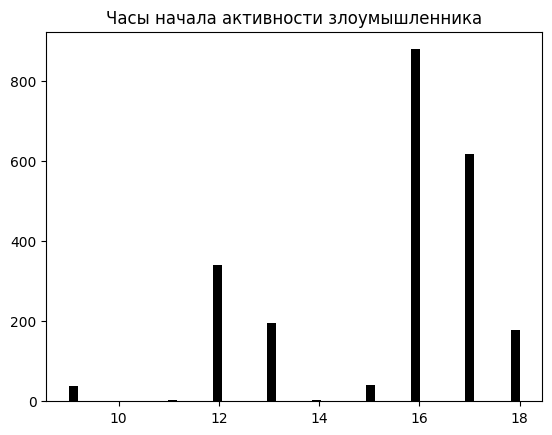

In [ ]:
train[train['target'] == 1]['start_hour'].hist(color='black', bins=50)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

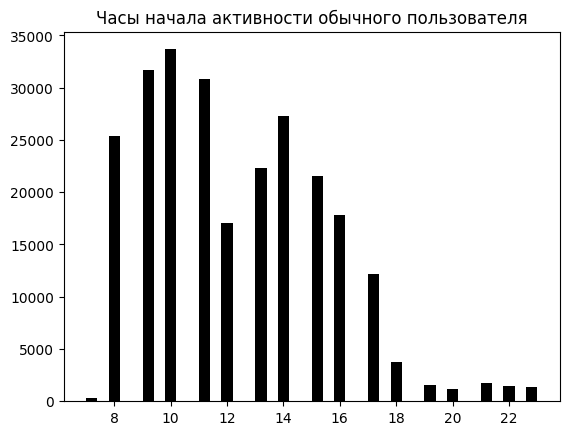

In [ ]:
train[train['target'] == 0]['start_hour'].hist(color='black', bins=40)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

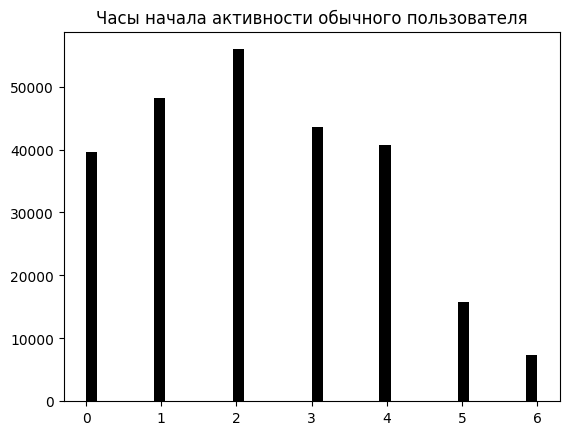

In [ ]:
train['weekday'] = train['time1'].dt.weekday
train['weekday'] = train['weekday'][:253561]
train[train['target'] == 0]['weekday'].hist(color='black', bins=40)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

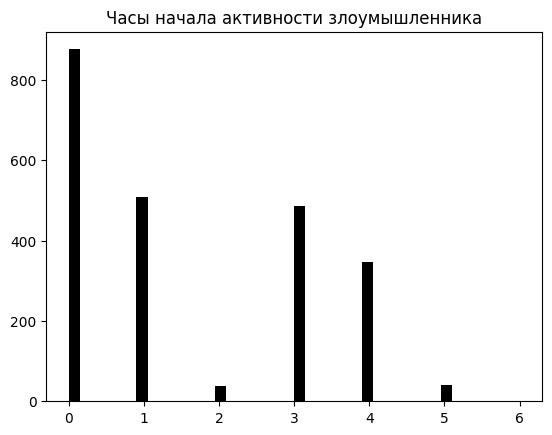

In [ ]:
train[train['target'] == 1]['weekday'].hist(color='black', bins=40)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

In [ ]:
train['weekend'] = train['weekday'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
train['weekend']

0         0
1         1
2         0
3         0
4         0
         ..
253556    0
253557    0
253558    0
253559    0
253560    0
Name: weekend, Length: 253561, dtype: int64

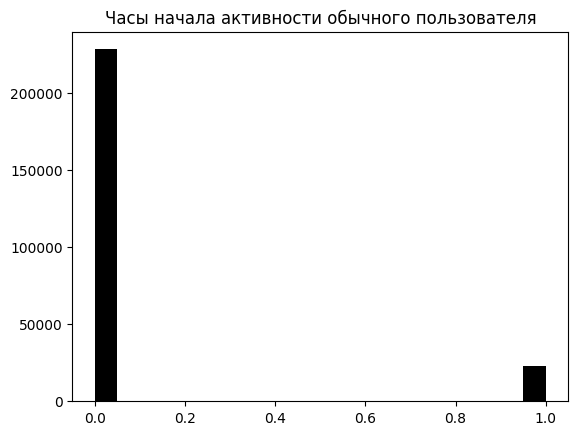

In [ ]:
train['weekend'] = train['weekend'][:253561]
train[train['target'] == 0]['weekend'].hist(color='black', bins=20)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

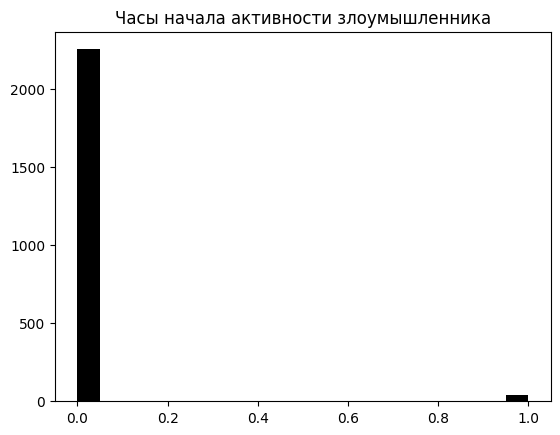

In [ ]:
train['weekend'] = train['weekend'][:253561]
train[train['target'] == 1]['weekend'].hist(color='black', bins=20)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

In [ ]:
train['start_hour'] = train['time1'].dt.hour
train['start_hour'] = train['start_hour'][:253561]

## 1.4 Конструирование признаков (Feature Engineering)

Необходимо создать такой признак, который будет представлять собой число вида ГГГГММ от той даты, когда проходила сессия. Например, 201407 - 2014 год и 7 месяц. Таким образом, мы будем учитывать помесячный линейный тренд за весь период предоставленных данных.

In [ ]:
train['ГГГГММ'] = train['time1'].apply(lambda x: str(x.year)) +\
    train['time1'].apply(lambda x: '0'+str(x.month) if len(str(x.month)) < 2 else str(x.month))

train['ГГГГММ'] = train['ГГГГММ'].astype("int32")
train['ГГГГММ']

0         201402
1         201402
2         201312
3         201403
4         201402
           ...  
253556    201311
253557    201303
253558    201309
253559    201312
253560    201404
Name: ГГГГММ, Length: 253561, dtype: int32

In [ ]:
for col in times_df_test.columns:
    times_df_test[col] = pd.to_datetime(times_df_test[col]).astype('int64') / 10**9
times_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time1   82797 non-null  float64
 1   time2   82797 non-null  float64
 2   time3   82797 non-null  float64
 3   time4   82797 non-null  float64
 4   time5   82797 non-null  float64
 5   time6   82797 non-null  float64
 6   time7   82797 non-null  float64
 7   time8   82797 non-null  float64
 8   time9   82797 non-null  float64
 9   time10  82797 non-null  float64
dtypes: float64(10)
memory usage: 6.3 MB


In [ ]:
for col in times_df_train.columns:
    times_df_train[col] = pd.to_datetime(times_df_train[col]).astype('int64') / 10**9
times_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time1   253561 non-null  float64
 1   time2   253561 non-null  float64
 2   time3   253561 non-null  float64
 3   time4   253561 non-null  float64
 4   time5   253561 non-null  float64
 5   time6   253561 non-null  float64
 6   time7   253561 non-null  float64
 7   time8   253561 non-null  float64
 8   time9   253561 non-null  float64
 9   time10  253561 non-null  float64
dtypes: float64(10)
memory usage: 19.3 MB


In [ ]:
train[[f'site{i}' for i in range(1, 11)]] = sites_df_train
train[[f'time{i}' for i in range(1, 11)]] = times_df_train
test[[f'site{i}' for i in range(1, 11)]] = sites_df_test
test[[f'time{i}' for i in range(1, 11)]] = times_df_test

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int16  
 2   time1       253561 non-null  float64
 3   site2       253561 non-null  int16  
 4   time2       253561 non-null  float64
 5   site3       253561 non-null  int16  
 6   time3       253561 non-null  float64
 7   site4       253561 non-null  int16  
 8   time4       253561 non-null  float64
 9   site5       253561 non-null  int16  
 10  time5       253561 non-null  float64
 11  site6       253561 non-null  int16  
 12  time6       253561 non-null  float64
 13  site7       253561 non-null  int16  
 14  time7       253561 non-null  float64
 15  site8       253561 non-null  int16  
 16  time8       253561 non-null  float64
 17  site9       253561 non-null  int16  
 18  time9       253561 non-null  float64
 19  si

In [ ]:
train.to_csv('train_df.csv', index = False)
test.to_csv('test_df.csv', index = False)